# JFAB

In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
from PIL import Image

df = pd.DataFrame()

# get all combined excel files for all folders
folder_path = r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas"
for folder in os.listdir(folder_path):
    if folder.endswith("xlsx"):
        continue
    for file in os.listdir(folder_path + "/" + folder):
        if file.endswith(".xlsx"):
            name = os.path.join(folder_path, folder, file)
            print(name)
            df.append(pd.read_excel(name, sheet_name = "Invoices"), ignore_index = True)
            


In [5]:
#interim solution

angelica = pd.read_excel(r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas/Angelica Mota Shops/Angelica Mota Shops Combined.xlsx", sheet_name = "Invoices")
bb = pd.read_excel(r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas\B&B Spa\B&B Spa Combined.xlsx", sheet_name = "Invoices")
high = pd.read_excel(r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas\Hair High Tech\Hair High Tech Combined.xlsx", sheet_name = "Invoices")
ladore = pd.read_excel(r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas\Ladore Beauty Bar\Ladore Beauty Salon Combined.xlsx", sheet_name = "Invoices")
lis = pd.read_excel(r"C:/Users/criss/iCloudDrive/Desktop/JFABULOUS 2022/Rutas\Lissys Salon Spa\Lissys Salon Combined.xlsx", sheet_name = "Invoices")

In [6]:
sales = pd.concat([angelica, bb, high, ladore, lis]).drop(columns = ["Qty", "Total $", "Unnamed: 17", "Qty left"])
sales.columns

Index(['Source.Name', 'Location', 'Delivery Date', 'Collection Date', 'Ref',
       'Item', 'category', 'Cost price $', 'Retail Price $', 'Resale Price $',
       'Qty sold', 'Revenue $', 'Gross $', 'Cost of goods $', 'Net $'],
      dtype='object')

In [13]:
sales["month_year"] = sales["Delivery Date"].apply(lambda x: x.strftime("%b %y"))

In [14]:
sales

,Source.Name,Location,Delivery Date,Collection Date,Ref,Item,category,Cost price $,Retail Price $,Resale Price $,Qty sold,Revenue $,Gross $,Cost of goods $,Net $,month_year
0,2022.08.18 Angelica Mota Shops.xlsx,Angelica Mota Shops,2022-08-18,44721,error,Collar,error,NaN,24,28.0,1,24,28.0,NaN,NaN,Aug 22
1,2022.08.18 Angelica Mota Shops.xlsx,Angelica Mota Shops,2022-08-18,44721,C-002,Collar Chocker,Collares,9.0,19,32.0,1,19,32.0,9.0,10.0,Aug 22
2,2022.08.18 Angelica Mota Shops.xlsx,Angelica Mota Shops,2022-08-18,44721,A-003,Arete de Larimar,Aretes,9.0,14,36.0,1,14,36.0,9.0,5.0,Aug 22
3,2022.09.06 Angelica Mota Shops.xlsx,Angelica Mota Shops,2022-06-09,44858,C-002,Collar Chocker,Collares,9.0,19,28.0,2,38,56.0,18.0,20.0,Jun 22
4,2022.09.06 Angelica Mota Shops.xlsx,Angelica Mota Shops,2022-06-09,44858,error,Collar,error,NaN,30,32.0,1,30,32.0,NaN,NaN,Jun 22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2022.11.14 Lissys Salon Spa.xlsx,Lissys Salon Spa,2022-11-14,2022-12-14 00:00:00,S-001,Sets de Plata,Sets,15.0,29,38.0,1,29,38.0,15.0,14.0,Nov 22
15,2022.12.12 Lissys Salon Spa.xlsx,Lissys Salon Spa,2022-12-12,2023-01-23 00:00:00,C-001,Cadena,Collares,12.0,22,28.0,2,44,56.0,24.0,20.0,Dec 22
16,2022.12.12 Lissys Salon Spa.xlsx,Lissys Salon Spa,2022-12-12,2023-01-23 00:00:00,G-005,Pulsas de Colores,Pulseras,2.0,10,13.0,1,10,13.0,2.0,8.0,Dec 22
17,2022.12.12 Lissys Salon Spa.xlsx,Lissys Salon Spa,2022-12-12,2023-01-23 00:00:00,G-008,Pulsas de plata,Pulseras,9.0,15,20.0,2,30,40.0,18.0,12.0,Dec 22


In [10]:
sales.dtypes

Source.Name                object
Location                   object
Delivery Date      datetime64[ns]
Collection Date            object
Ref                        object
Item                       object
category                   object
Cost price $              float64
Retail Price $              int64
Resale Price $            float64
Qty sold                    int64
Revenue $                   int64
Gross $                   float64
Cost of goods $           float64
Net $                     float64
dtype: object

In [7]:
sales.groupby("Location")["Revenue $"].sum()

Location
Angelica Mota Shops     468
B&B Spa                 932
Hair High Tech         1293
Ladore Beauty Salon     771
Lissys Salon Spa        547
Name: Revenue $, dtype: int64

Text(0, 0.5, 'Revenue $')

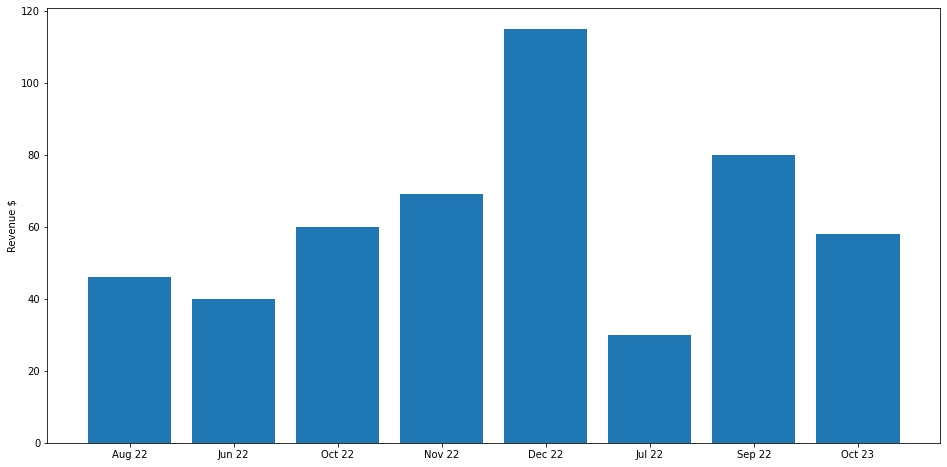

In [35]:
fig, ax = plt.subplots(figsize =(16, 8))
plt.bar(sales["month_year"], sales["Revenue $"])
ax.set_ylabel("Revenue $")
plt.show()

#sns.barplot(data = sales, x = "month_year", y = "Revenue $")